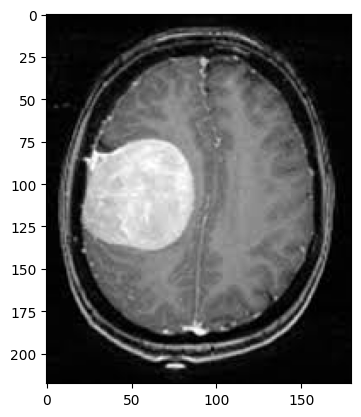

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR = "E:\\2) ML Lab\\1907083_CNN_Classification\\train"
CATEGORIES = ["yes_tumor","no_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  #grayscale
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
print(img_array.shape)  #only height and width!

(218, 180)


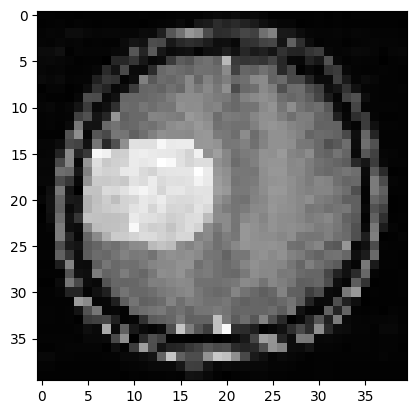

In [3]:
image_size=40
new_array=cv2.resize(img_array,(image_size,image_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
#resizing height==width
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) #0 & 1 absent & present
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  #grayscale
                new_array = cv2.resize(img_array, (image_size,image_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
print(len(training_data))

180


In [6]:
import random
random.shuffle(training_data)

In [7]:
X = []
Y = []

In [8]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
X=np.array(X).reshape(-1, image_size, image_size, 1)  #1 for grayscale saying so and 3 for rgb (didn't understand)

In [9]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [10]:
pickle_in=open("X.pickle","rb")
X = pickle.load(pickle_in)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
X= pickle.load(open("X.pickle","rb"))
Y= pickle.load(open("Y.pickle","rb"))
Y = np.array(Y)
X = X/255.0
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
model.fit(X,Y,batch_size=32, epochs=5, validation_split=0.4)

Epoch 1/5


C:\Users\meemc\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.5359 - loss: 0.6885 - val_accuracy: 0.6389 - val_loss: 0.6149
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7023 - loss: 0.6090 - val_accuracy: 0.7500 - val_loss: 0.5602
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7473 - loss: 0.5383 - val_accuracy: 0.7500 - val_loss: 0.5403
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.7514 - loss: 0.5124 - val_accuracy: 0.7361 - val_loss: 0.5359
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7616 - loss: 0.5055 - val_accuracy: 0.7500 - val_loss: 0.5198


In [12]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
#from tensorflow.keras.processing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)
pickle_in = open("Y.pickle","rb")
Y=pickle.load(pickle_in)
print(X.shape)
#print(Y.shape)
Y = np.array(Y)
X = X/255.0
#X = [x / 255.0 for x in X]
dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)
            model = Sequential()
            model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Flatten())
        for _ in range (dense_layer):
            model.add(Dense(layer_size))
            model.add(Activation('relu'))
        model.add(Dense(1))
        model.add(Activation('sigmoid'))     
        tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))       
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'],
                      )       
        model.fit(X, Y,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.3,
                    callbacks=[tensorboard])
model.save('brain_tumor_classifier.keras')

(180, 40, 40, 1)
3-conv-64-nodes-0-dense-1716905354
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.5374 - loss: 0.6686 - val_accuracy: 0.5636 - val_loss: 0.6801
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7087 - loss: 0.5915 - val_accuracy: 0.6727 - val_loss: 0.5821
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.7120 - loss: 0.5447 - val_accuracy: 0.6909 - val_loss: 0.6370
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6922 - loss: 0.5519 - val_accuracy: 0.7091 - val_loss: 0.5936
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7433 - loss: 0.5019 - val_accuracy: 0.7636 - val_loss: 0.5516
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7581 - loss: 0.4658 - val_accuracy: 0.7818 - val_loss: 0.5658
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7719 - loss: 0.4657 - val_accuracy: 0.7818 - val_loss: 0.5342
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.7845 

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 23104)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        23,105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,237 (278.27 KB)

 Trainable params: 23,745 (92.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,492 (185.52 KB)

In [14]:
import cv2
import tensorflow as tf
CATEGORIES = ["Yes Tumor Detected!!","No Tumor Detected!"]
def prepare(filepath):
    IMG_SIZE = 40
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("brain_tumor_classifier.keras")

In [15]:
# List of image file paths
image_files = [
    'no1.jpg',
    'no2.jpg',
    'no4.jpg',
    'yes1.jpg',
    'yes2.jpg',
    'no3.jpg',
    'yes3.jpg',
    'yes4.jpg'
]
# Looping over each image file and making predictions
for image_file in image_files:
    try:
        prediction = model.predict([prepare(image_file)])
        print(f"{image_file}: {CATEGORIES[int(prediction[0][0])]}")
    except Exception as e:
        print(f"Error processing {image_file}: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
no1.jpg: No Tumor Detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
no2.jpg: No Tumor Detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
no4.jpg: No Tumor Detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
yes1.jpg: Yes Tumor Detected!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
yes2.jpg: Yes Tumor Detected!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
no3.jpg: No Tumor Detected!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
yes3.jpg: Yes Tumor Detected!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
yes4.jpg: Yes Tumor Detected!!
